In [28]:
# Dependnecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Load the csv file
mcdonalds=pd.read_csv("C:/Users/risha/Downloads/mcdonalds.csv") 

In [30]:
# Columns in dataframe
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [31]:
# Size of the dataframe
mcdonalds.shape

(1453, 15)

In [32]:
# Print first 3 rows
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [33]:
# Select the first 11 columns and convert them to a matrix
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means
column_means = np.round(np.mean(MD_x, axis=0), 2)

print(column_means)


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [34]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Display summary
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [35]:
# Print the principal components with specified digits
print(np.round(pca.components_, 1))


[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


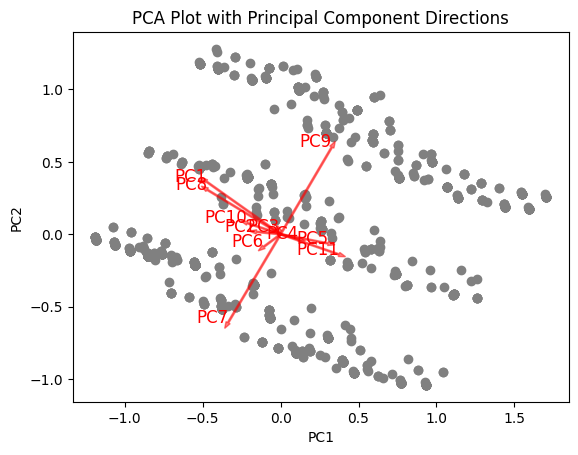

In [36]:
# Plot PCA results with principal component directions
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')

# Plot principal component directions as arrows
for i, (component1, component2) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):
    plt.arrow(0, 0, component1, component2, color='r', alpha=0.5, width=0.01)
    plt.text(component1, component2, f'PC{i+1}', color='r', fontsize=12, ha='right')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot with Principal Component Directions')
plt.show()


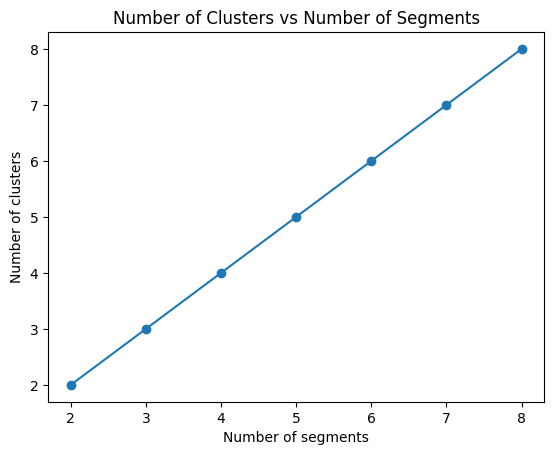

In [37]:
from sklearn.cluster import KMeans

# Set seed for reproducibility
np.random.seed(1234)

# Perform K-means clustering with a range of cluster numbers
results = {}
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(MD_x)
    results[n_clusters] = kmeans

# Relabel the clusters
relabel_results = {}
for n_clusters, kmeans in results.items():
    labels = kmeans.labels_
    relabel_results[n_clusters] = labels

# Plotting the results
plt.plot(list(relabel_results.keys()), [len(set(labels)) for labels in relabel_results.values()], marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Number of clusters')
plt.title('Number of Clusters vs Number of Segments')
plt.show()


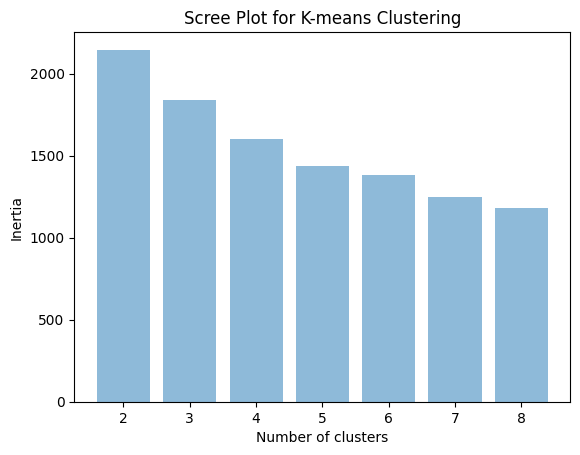

In [38]:
# Set the seed
np.random.seed(1234)

# Perform K-means clustering for k=2 to 8
k_range = range(2, 9)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)

# Plot the scree plot as a bar chart
plt.bar(k_range, inertia, align='center', alpha=0.5)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for K-means Clustering')
plt.show()


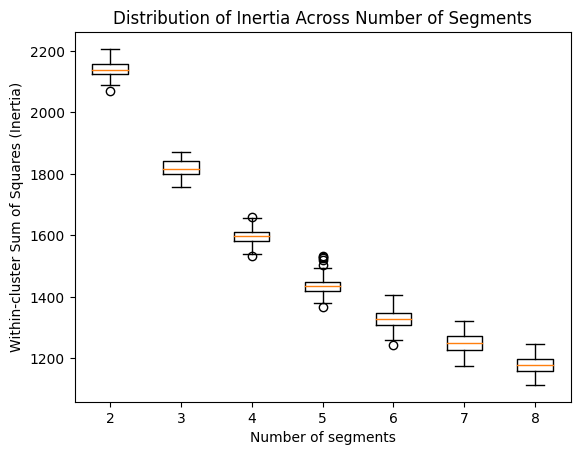

In [39]:
from sklearn.cluster import KMeans
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1234)

# Function to perform K-means clustering and calculate inertia
def kmeans_and_inertia(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(data)
    return kmeans.inertia_

# Perform bootstrapping with a range of cluster numbers
boot_results = {}
for n_clusters in range(2, 9):
    bootstrapped_inertia = []
    for _ in range(100):
        boot_data = resample(MD_x)
        boot_inertia = kmeans_and_inertia(boot_data, n_clusters)
        bootstrapped_inertia.append(boot_inertia)
    boot_results[n_clusters] = bootstrapped_inertia

# Create a box plot
plt.boxplot(boot_results.values(), labels=boot_results.keys())
plt.xlabel('Number of segments')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Distribution of Inertia Across Number of Segments')
plt.show()


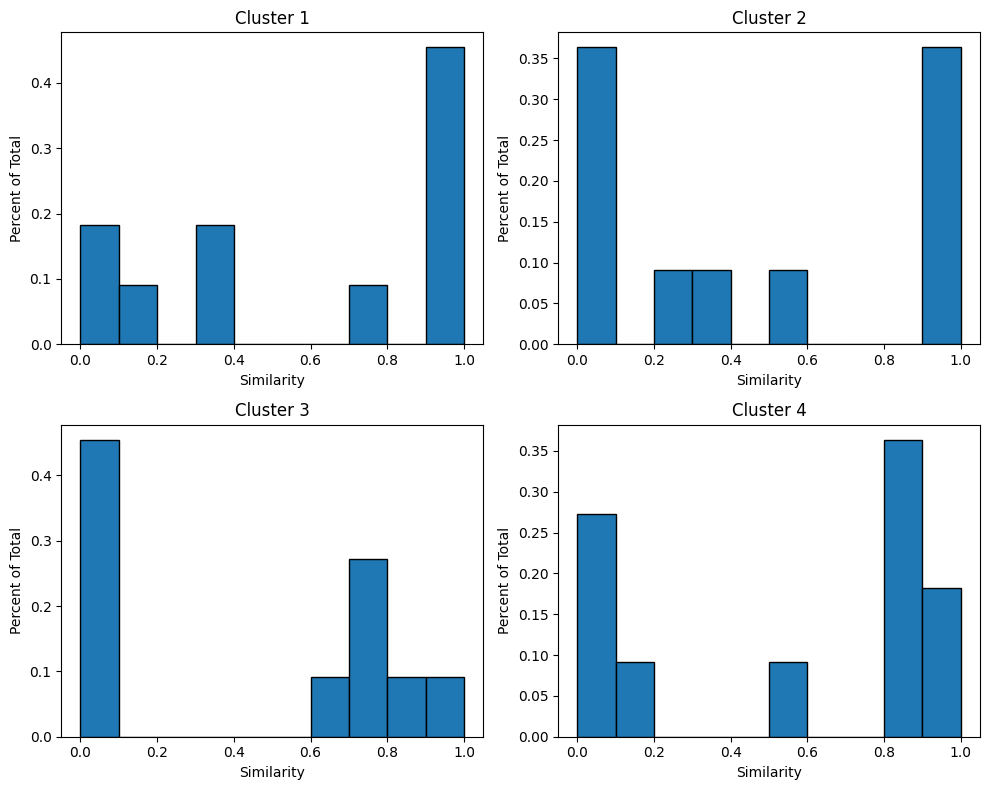

In [40]:
# Perform K-means clustering for k=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
MD_kmeans_labels = kmeans.fit_predict(MD_x)

# Compute the similarity values for each cluster
similarity_values = []
for cluster_number in range(k):
    # Extract the data points belonging to the current cluster
    cluster_data = MD_x[MD_kmeans_labels == cluster_number]
    # Compute the similarity (mean value) for the current cluster
    similarity = np.mean(cluster_data, axis=0)
    similarity_values.append(similarity)

# Create subplots for each cluster
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate over each cluster
for cluster_number, (similarity, ax) in enumerate(zip(similarity_values, axs.flatten()), 1):
    # Plot the histogram of the current cluster
    ax.hist(similarity, bins=10, range=(0, 1), edgecolor='black', weights=np.ones_like(similarity) / len(similarity))
    ax.set_title(f'Cluster {cluster_number}')

    # Set x-axis label
    ax.set_xlabel('Similarity')

    # Set y-axis label
    ax.set_ylabel('Percent of Total')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


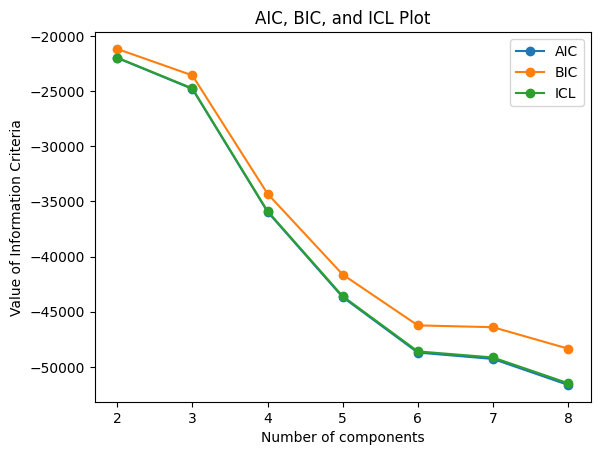

In [41]:
from sklearn.mixture import GaussianMixture

# Perform Gaussian Mixture Model (GMM) fitting for k=2 to 8
k_range = range(2, 9)
aic_values = []
bic_values = []
icl_values = []
for k in k_range:
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x)
    aic = gmm.aic(MD_x)
    bic = gmm.bic(MD_x)
    likelihood = np.exp(gmm.score(MD_x))
    df = k * (MD_x.shape[1] + 1) - 1  # Degrees of freedom
    icl = aic - 2 * np.log(likelihood) + 2 * df
    aic_values.append(aic)
    bic_values.append(bic)
    icl_values.append(icl)

# Plot the values of information criteria (AIC, BIC, ICL)
plt.plot(k_range, aic_values, label='AIC', marker='o')
plt.plot(k_range, bic_values, label='BIC', marker='o')
plt.plot(k_range, icl_values, label='ICL', marker='o')
plt.xlabel('Number of components')
plt.ylabel('Value of Information Criteria')
plt.title('AIC, BIC, and ICL Plot')
plt.legend()
plt.show()


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture

# Get cluster number 4 from K-means clustering result
kmeans_cluster_4 = MD_kmeans_labels == 3  # Cluster numbers start from 0 in Python

# Get the data points belonging to cluster number 4 from the mixture model result (MD.m4)
MD_m4 = GaussianMixture(n_components=4, random_state=1234)
MD_m4.fit(MD_x)
mixture_cluster_4 = MD_m4.predict(MD_x) == 3  # Cluster numbers start from 0 in Python

# Compute confusion matrix between K-means and mixture model clusters for cluster number 4
conf_matrix = confusion_matrix(kmeans_cluster_4, mixture_cluster_4)

print("Confusion Matrix:")
print(conf_matrix)

# Compute log-likelihood for the Gaussian Mixture Model (MD.m4)
log_likelihood_m4 = MD_m4.score(MD_x)

print("Log-likelihood (Gaussian Mixture Model):", log_likelihood_m4)


Confusion Matrix:
[[633 488]
 [168 164]]
Log-likelihood (Gaussian Mixture Model): 11.727872558164462


In [43]:
from collections import Counter

# Create a Counter object to count occurrences of each unique value in the 'Like' column
like_counts = Counter(mcdonalds['Like'])

# Reverse the table of values
reversed_table = dict(reversed(like_counts.items()))

print("Reversed Table of Values:")
print(reversed_table)


Reversed Table of Values:
{'-1': 58, '-4': 71, '0': 169, '+3': 229, '-2': 59, 'I hate it!-5': 152, 'I love it!+5': 143, '+4': 160, '+1': 152, '+2': 187, '-3': 73}


In [44]:
import pandas as pd

# Replace unexpected string values with NaN in the 'Like' column
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Create a new column 'Like.n' by subtracting each value of 'Like' from 6
mcdonalds['Like.n'] = 6 - mcdonalds['Like']

# Calculate the frequency of each unique value in the 'Like.n' column
like_n_counts = mcdonalds['Like.n'].value_counts()

print("Table of Like.n:")
print(like_n_counts)


Table of Like.n:
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: Like.n, dtype: int64


In [45]:
from patsy import dmatrices

# Concatenate the column names from the first 11 columns with "+"
f = " + ".join(mcdonalds.columns[:11])

# Concatenate the formula string "Like.n ~" with the concatenated column names
f = "Like.n ~ " + f

# Create a formula object
formula = f

print("Formula:")
print(formula)



Formula:
Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [46]:
import statsmodels.api as sm

# Create 'Like_n' column by subtracting each value of 'Like' from 6
mcdonalds['Like_n'] = 6 - pd.to_numeric(mcdonalds['Like'])

# Correct the formula to include 'Like_n' as a column in the DataFrame
formula_corrected = "Like_n ~ " + "+".join(mcdonalds.columns[:11])

# Fit flexible regression model using statsmodels
model = sm.GLM.from_formula(formula_corrected, data=mcdonalds, family=sm.families.Gaussian())
result = model.fit()

# Print the model summary
print(result.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Like_n   No. Observations:                 1158
Model:                            GLM   Df Residuals:                     1146
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                          2.8928
Method:                          IRLS   Log-Likelihood:                -2252.1
Date:                Fri, 31 May 2024   Deviance:                       3315.1
Time:                        20:10:35   Pearson chi2:                 3.32e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6040
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.8765      0.31

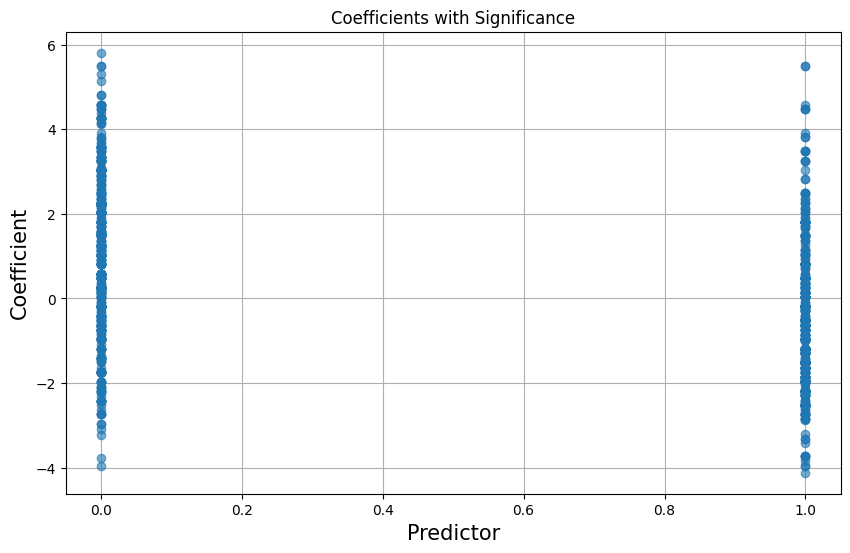

In [47]:
# Get the exogenous variable names from the model
exog_names = result.model.exog_names

# Plot the coefficients with significance for the first predictor variable
fig, ax = plt.subplots(figsize=(10, 6))
result.plot_ceres_residuals(exog_names[1], ax=ax)  # Change the index to the predictor variable you want to plot
plt.xlabel('Predictor')
plt.ylabel('Coefficient')
plt.title('Coefficients with Significance')
plt.grid(True)
plt.show()


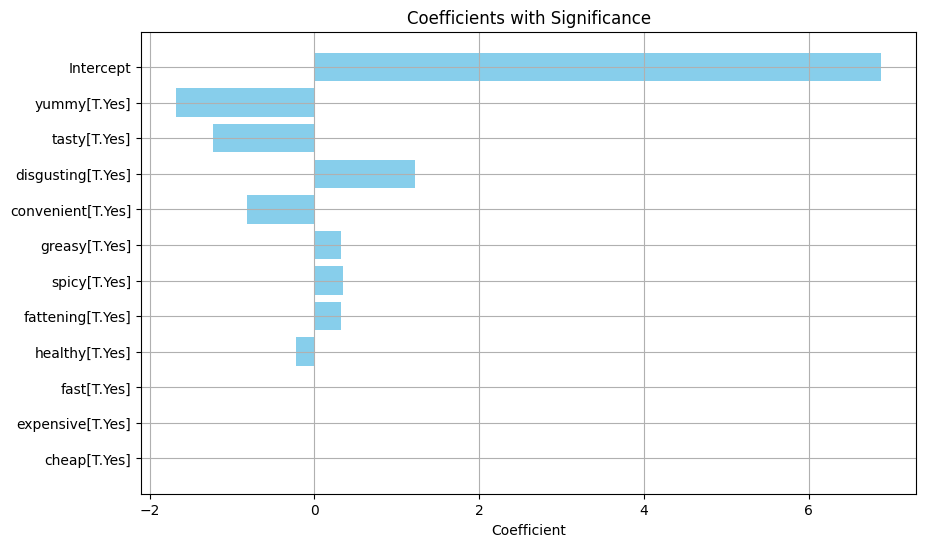

In [48]:
# Get the coefficient names and their significance values
coefs = result.params
p_values = result.pvalues

# Sort the coefficients and their significance values in ascending order of significance
sorted_indices = np.argsort(p_values)
coefs_sorted = coefs[sorted_indices]
p_values_sorted = p_values[sorted_indices]

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(coefs_sorted))
ax.barh(y_pos, coefs_sorted, color='skyblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(coefs_sorted.index)
ax.invert_yaxis()  # Invert the y-axis to have the highest coefficient at the top
ax.set_xlabel('Coefficient')
ax.set_title('Coefficients with Significance')
plt.grid(True)
plt.show()


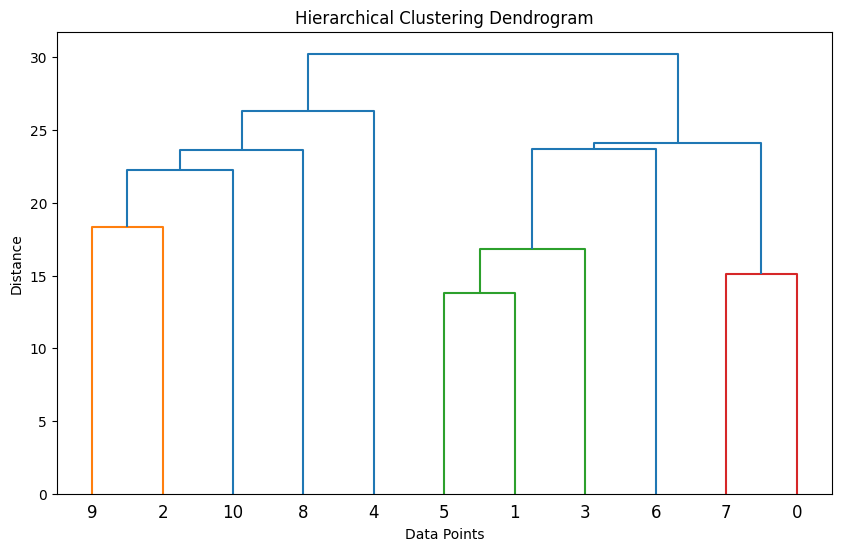

In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
MD_vclust = linkage(MD_x.T, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust, orientation='top', labels=None, distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


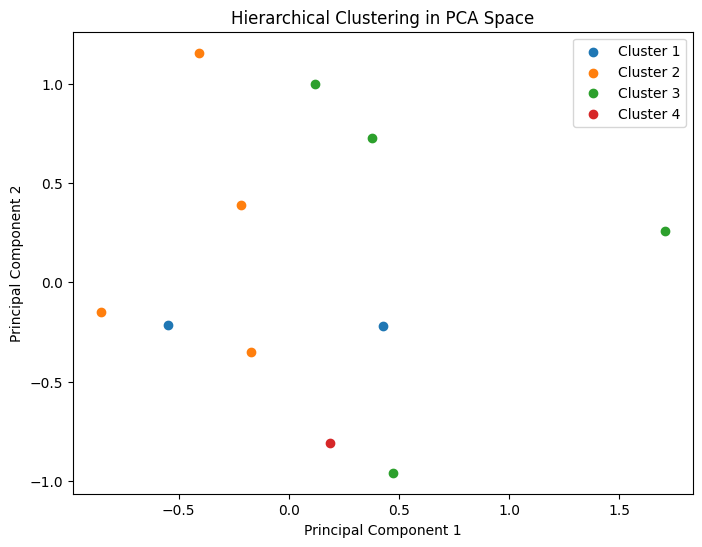

In [50]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster

# Calculate pairwise distances
distances = pdist(MD_x.T)

# Perform hierarchical clustering
MD_vclust = linkage(distances, method='average')

# Determine cluster assignments
num_clusters = 4  # Assuming you want 4 clusters
cluster_assignments = fcluster(MD_vclust, num_clusters, criterion='maxclust')

# Plot clusters on the PCA plot
plt.figure(figsize=(8, 6))
for cluster_num in range(1, num_clusters + 1):
    cluster_indices = np.where(cluster_assignments == cluster_num)[0]
    plt.scatter(MD_pca[cluster_indices, 0], MD_pca[cluster_indices, 1], label=f'Cluster {cluster_num}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering in PCA Space')
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

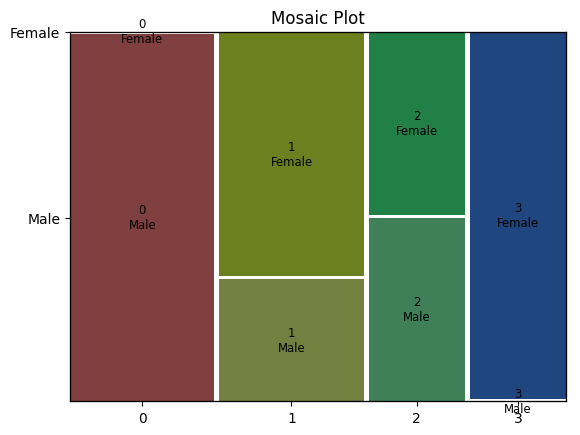

In [51]:
from statsmodels.graphics.mosaicplot import mosaic

# Example data
k4 = [0, 1, 0, 1, 2, 3, 2, 3, 0, 1]  # Example cluster labels
mcdonalds = pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female']})  # Example DataFrame with Gender column

# Create a DataFrame with cluster and Gender values
cluster_gender_df = pd.DataFrame({'Cluster': k4, 'Gender': mcdonalds['Gender']})

# Plot mosaic plot
plt.figure(figsize=(8, 6))
mosaic(cluster_gender_df, ['Cluster', 'Gender'], title='Mosaic Plot', gap=0.01)
plt.show()
